In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt

In [13]:
# Creating our portfolio of equities
tickers=['AAPL','FB','C','DIS']

In [14]:
# Set weights 
weights=np.array([.25,.3,.15,.3])

In [15]:
initial_investment=1000000

In [16]:
data=pdr.get_data_yahoo(tickers,start='2018-01-01',end=dt.date.today())['Close']

In [17]:
returns=data.pct_change()

In [18]:
returns.head()

Symbols,AAPL,FB,C,DIS
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.017914,0.003093,0.004293
2018-01-04,0.004645,-0.001841,0.012334,-0.000445
2018-01-05,0.011385,0.013671,-0.001324,-0.005435
2018-01-08,-0.003714,0.007653,-0.011670,-0.014334


In [20]:
data

Symbols,AAPL,FB,C,DIS
Date,,,,
2018-01-02,43.064999,181.419998,74.360001,111.800003
2018-01-03,43.057499,184.669998,74.589996,112.279999
2018-01-04,43.257500,184.330002,75.510002,112.230003
2018-01-05,43.750000,186.850006,75.410004,111.620003
2018-01-08,43.587502,188.279999,74.529999,110.019997
...,...,...,...,...
2021-03-16,125.570000,279.279999,73.330002,194.240005
2021-03-17,124.760002,284.010010,73.599998,195.240005
2021-03-18,120.529999,278.619995,73.839996,192.279999


In [21]:
# Variance-Covariance Matrix
cov_matrix=returns.cov()
cov_matrix

Symbols,AAPL,FB,C,DIS
Symbols,,,,
AAPL,0.000488,0.000328,0.000296,0.000209
FB,0.000328,0.000565,0.000260,0.000194
C,0.000296,0.000260,0.000743,0.000366
DIS,0.000209,0.000194,0.000366,0.000442


In [22]:
avg_returns=returns.mean()

In [23]:
avg_returns

Symbols
AAPL    0.001546
FB      0.000881
C       0.000333
DIS     0.000893
dtype: float64

In [24]:
port_mean=avg_returns.dot(weights)

In [25]:
port_stdev=np.sqrt(weights.T.dot(cov_matrix).dot(weights))

In [30]:
mean_investment=(1+port_mean)*initial_investment

In [29]:
std_investment=initial_investment*port_stdev

In [31]:
#Calculating cutoff value from normal distribution using mean and std of our portfolio
conf_level=0.05
from scipy.stats import norm
cut_off=norm.ppf(conf_level,mean_investment,std_investment)

C:\Users\dixit\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dixit\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [32]:
VaR=initial_investment-cut_off

In [33]:
VaR

28989.671045625466

In [43]:
# Calculating n day VaR
var_array=[]
num_days=int(15)
for x in range(1,num_days+1):
    var_array.append(np.round(VaR*np.sqrt(x),2))
    print(str(x)+ " Day VaR @ 99% confidence: "+ str(np.round(VaR*np.sqrt(x),2)))

1 Day VaR @ 99% confidence: 28989.67
2 Day VaR @ 99% confidence: 40997.59
3 Day VaR @ 99% confidence: 50211.58
4 Day VaR @ 99% confidence: 57979.34
5 Day VaR @ 99% confidence: 64822.88
6 Day VaR @ 99% confidence: 71009.9
7 Day VaR @ 99% confidence: 76699.46
8 Day VaR @ 99% confidence: 81995.17
9 Day VaR @ 99% confidence: 86969.01
10 Day VaR @ 99% confidence: 91673.39
11 Day VaR @ 99% confidence: 96147.86
12 Day VaR @ 99% confidence: 100423.17
13 Day VaR @ 99% confidence: 104523.75
14 Day VaR @ 99% confidence: 108469.42
15 Day VaR @ 99% confidence: 112276.51


UsageError: Line magic function `%matplotlibinline` not found.


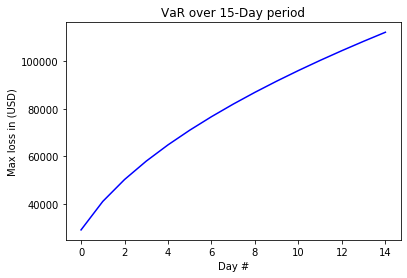

In [51]:
# Build plot
import matplotlib.pyplot as plt
plt.xlabel("Day #")
plt.ylabel("Max loss in (USD)")
plt.title("VaR over 15-Day period")
plt.plot(var_array,"b")
%matplotlibinline